Training Accuracy: 93.12%
Testing Accuracy: 87.50%


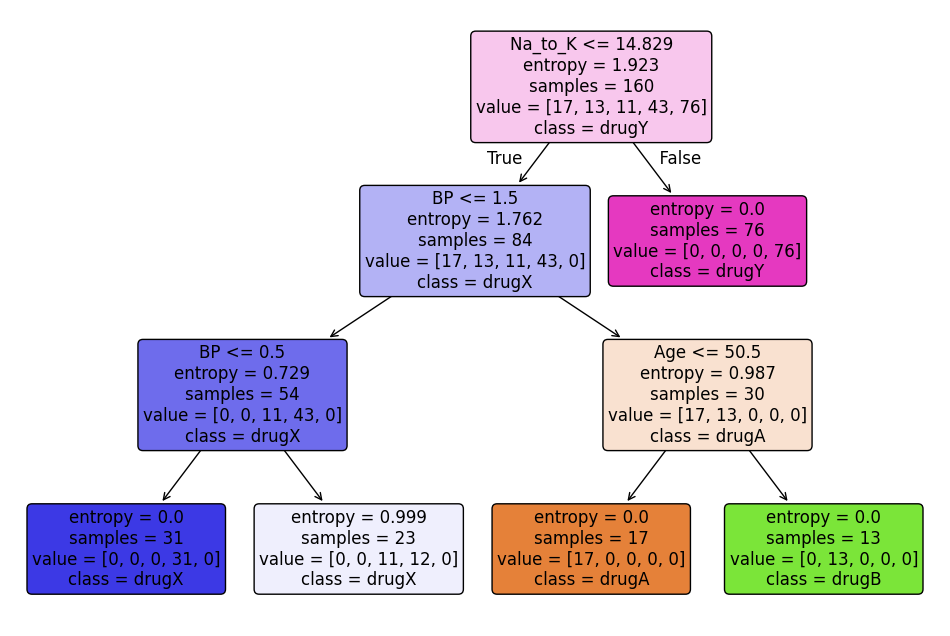

Node 0: Feature = Na_to_K, Impurity (Entropy) = 1.9231, Samples = 160, Value = [[0.10625 0.08125 0.06875 0.26875 0.475  ]]
Node 1: Feature = BP, Impurity (Entropy) = 1.7617, Samples = 84, Value = [[0.20238095 0.1547619  0.13095238 0.51190476 0.        ]]
Node 2: Feature = BP, Impurity (Entropy) = 0.7293, Samples = 54, Value = [[0.        0.        0.2037037 0.7962963 0.       ]]
Node 5: Feature = Age, Impurity (Entropy) = 0.9871, Samples = 30, Value = [[0.56666667 0.43333333 0.         0.         0.        ]]
Cross-validation scores: [0.925 0.9   0.925 0.825 0.925]
Mean cross-validation score: 0.90


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from CSV file
df = pd.read_csv('drug200.csv')

# Convert categorical variables into numerical ones
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['BP'] = df['BP'].map({'NORMAL': 0, 'LOW': 1, 'HIGH': 2})
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})

# Define features (X) and target (y)
X = df.drop('Drug', axis=1)
y = df['Drug']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with entropy criterion
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)  # You can change max_depth here
clf.fit(X_train, y_train)

# Predict the target values for training and testing sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy on both training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

# Visualize the tree with entropy and gain at each node
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, rounded=True, fontsize=12, ax=ax)
plt.show()

# Print the tree with entropy and gain details
def print_tree_with_metrics(tree, feature_names):
    # Print the feature names and their corresponding entropy and gain
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature_name = [feature_names[i] if i != -2 else "undefined" for i in tree.tree_.feature]
    threshold = tree.tree_.threshold
    impurity = tree.tree_.impurity  # Entropy at each node
    n_node_samples = tree.tree_.n_node_samples
    value = tree.tree_.value  # Predicted values at each node

    for i in range(n_nodes):
        if children_left[i] != -1:  # Check if it's a valid node
            print(f"Node {i}: Feature = {feature_name[i]}, Impurity (Entropy) = {impurity[i]:.4f}, "
                  f"Samples = {n_node_samples[i]}, Value = {value[i]}")

# Print the tree with metrics
print_tree_with_metrics(clf, X.columns)

# Perform cross-validation to check model performance
#cv_scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores and their mean
#print(f'Cross-validation scores: {cv_scores}')
#print(f'Mean cross-validation score: {np.mean(cv_scores):.2f}')
